In [ ]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
pressure_df = pd.read_csv("/content/pressure_day279.csv", header = None)
wind_df = pd.read_csv("/content/wind_day279.csv", header = None)

In [ ]:
min = pressure_df.min().min()
max = pressure_df.max().max()
print('Min :', min)
print('Max :', max)

cluster = round((max-min)/100)
print('Number of cluster: ', cluster)

min1 = wind_df.min().min()
max1 = wind_df.max().max()
print("Min1: ", min1)
print("Max1: ", max1)
cl = round((max1 - min1)/6)
print(cl)

Min : 11121
Max : 12523
Number of cluster:  14
Min1:  -28
Max1:  54
14


In [ ]:
print(np.array(pressure_df))
pressure = np.array(pressure_df).reshape(-1,1)
kmeans = KMeans(n_clusters=cluster)
kmeans.fit(pressure)

wind = np.array(wind_df).reshape(-1,1)
kmeans1 = KMeans(n_clusters = cl)
kmeans1.fit(wind)

[[12481 12480 12479 ... 12417 12419 12422]
 [12480 12480 12479 ... 12414 12415 12416]
 [12478 12478 12478 ... 12413 12412 12411]
 ...
 [11226 11233 11240 ... 11131 11132 11134]
 [11208 11215 11221 ... 11126 11126 11127]
 [11193 11199 11205 ... 11121 11122 11123]]


KMeans(n_clusters=14)

labels: [2 2 2 ... 4 4 4]


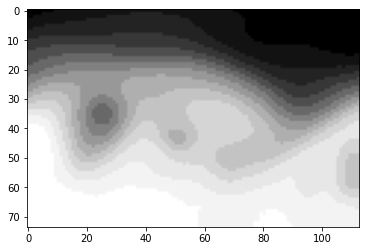

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("labels:", labels)
#print('Centroids: ', centroids)
    
colors = centroids.round(0).astype(int)
#print("colors:", colors)
    
pressure_img = colors[labels].reshape(pressure_df.shape)
pressure_img = np.flip(pressure_img, 0)
plt.imshow(pressure_img, cmap='gray')
plt.show()


[ 1  1  1 ... 12 12 12]
[[ 28]
 [ -1]
 [ 19]
 [ 49]
 [-13]
 [ 10]
 [ 35]
 [ -6]
 [  6]
 [ 14]
 [ 23]
 [ 42]
 [  3]
 [-22]]


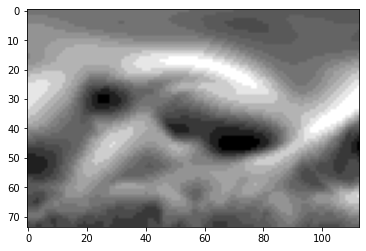

In [ ]:
labels1 = kmeans1.labels_
centroids1 = kmeans1.cluster_centers_
print(labels1)
#print(centroids1)
colors1 = centroids1.round(0).astype(int)
print(colors1)

wind_img = colors1[labels1].reshape(wind_df.shape)
wind_img = np.flip(wind_img, 0)
plt.imshow(wind_img, cmap = "gray")
plt.show()

[[[12481    -3]
  [12480    -3]
  [12479    -3]
  ...
  [12417     7]
  [12419     7]
  [12422     7]]

 [[12480     1]
  [12480     2]
  [12479     2]
  ...
  [12414     9]
  [12415     9]
  [12416    10]]

 [[12478     5]
  [12478     6]
  [12478     6]
  ...
  [12413    12]
  [12412    12]
  [12411    13]]

 ...

 [[11226    13]
  [11233    13]
  [11240    13]
  ...
  [11131     3]
  [11132     4]
  [11134     4]]

 [[11208    11]
  [11215    11]
  [11221    11]
  ...
  [11126     3]
  [11126     3]
  [11127     3]]

 [[11193     9]
  [11199     9]
  [11205     9]
  ...
  [11121     2]
  [11122     2]
  [11123     2]]]
74 113 2
[3 3 3 ... 6 6 6]
[[1.13481965e+04 1.21588050e+01]
 [1.22625578e+04 1.32571429e+01]
 [1.19530810e+04 2.18122530e+01]
 [1.24658968e+04 3.82912844e+00]
 [1.15799164e+04 3.00626866e+01]
 [1.20712722e+04 2.13270321e+01]
 [1.11754310e+04 4.54597701e+00]
 [1.23491078e+04 1.40335329e+01]
 [1.17098293e+04 3.12073171e+01]
 [1.21741427e+04 1.17781775e+01]
 [1.12557918e

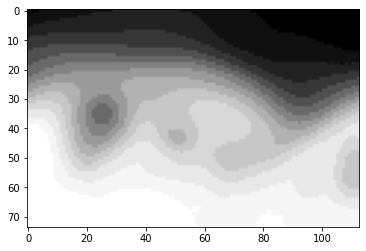

In [ ]:
df_array = np.stack((np.array(pressure_df), np.array(wind_df)), axis = 2)
#print(df_array)

#print(df_array)
(h,w,c) = df_array.shape
print(h,w,c)
img2D = df_array.reshape(h*w, c)

#X = df_array.reshape(-1,1)
kmeans2 = KMeans(n_clusters = cluster)
cluster_labels = kmeans2.fit_predict(img2D)
#kmeans2.fit(X)
print(cluster_labels)

#labels2 = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_
print(centroids2)

colors2 = centroids2.round(0).astype(int)
#print(colors2)

img = np.reshape(colors2[cluster_labels], (h,w,c))
#alpha = np.zeros((74, 113))
#img = np.dstack((img,alpha))


#print(img)

#print(img.shape)
#print(img)
plt.imshow(np.flip(img[:,:,0], axis = 0), cmap = "gray")
#img_rgb = np.concatenate((img, np.zeros_like(img)), axis=2)
#img_rgb[:, :, 2] = 225
#img_rgb[:, :, 3] = 225
#print(img_rgb)
#print(len(img_rgb))
#plt.imshow(img_rgb)

#plt.imshow(img, cmap = "gray")
plt.show()

StandardScaler()
[12088.77027027 12093.75675676 12097.93243243 12101.13513514
 12103.75675676 12105.54054054 12105.74324324 12104.36486486
 12101.24324324 12096.59459459 12090.31081081 12082.22972973
 12072.01351351 12059.98648649 12046.45945946 12031.7027027
 12016.40540541 12001.55405405 11987.59459459 11974.58108108
 11963.48648649 11954.5        11947.89189189 11943.85135135
 11943.01351351 11945.43243243 11950.7027027  11958.59459459
 11969.16216216 11981.45945946 11994.97297297 12008.67567568
 12022.16216216 12034.66216216 12045.81081081 12055.45945946
 12063.31081081 12069.25675676 12073.27027027 12075.77027027
 12076.63513514 12075.87837838 12073.71621622 12071.13513514
 12068.2027027  12064.7027027  12059.35135135 12053.89189189
 12049.52702703 12045.83783784 12042.98648649 12040.87837838
 12040.14864865 12040.52702703 12041.77027027 12042.83783784
 12043.58108108 12043.41891892 12041.72972973 12039.06756757
 12035.37837838 12030.81081081 12024.85135135 12018.27027027
 12010.7

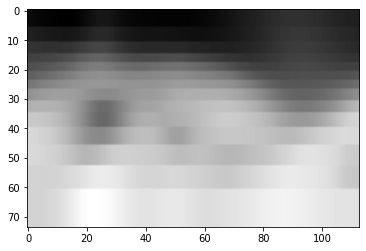

In [ ]:
from sklearn.preprocessing import StandardScaler
pressure_array = np.array(pressure_df)
scaler = StandardScaler()
print(scaler.fit(pressure_array))
print(scaler.mean_)
print(scaler.transform(pressure_array))

kmeans3 = KMeans(n_clusters = cluster)
kmeans3.fit(scaler.transform(pressure_array))
labels3 = kmeans3.labels_
centroids3 = kmeans3.cluster_centers_

image = centroids3[labels3].reshape(pressure_df.shape)
image = np.flip(image, axis = 0)
plt.imshow(image, cmap = "gray")
plt.show()

MinMaxScaler()
[12523. 12518. 12512. 12504. 12494. 12488. 12486. 12485. 12483. 12486.
 12487. 12490. 12489. 12481. 12478. 12476. 12475. 12473. 12469. 12469.
 12469. 12470. 12468. 12468. 12472. 12478. 12477. 12466. 12467. 12467.
 12469. 12469. 12470. 12471. 12471. 12472. 12473. 12474. 12474. 12474.
 12479. 12478. 12480. 12484. 12483. 12486. 12485. 12469. 12466. 12462.
 12460. 12462. 12460. 12457. 12455. 12448. 12445. 12451. 12441. 12433.
 12430. 12429. 12426. 12425. 12425. 12424. 12424. 12424. 12424. 12426.
 12428. 12431. 12433. 12431. 12430. 12433. 12434. 12437. 12440. 12444.
 12445. 12460. 12448. 12451. 12448. 12442. 12442. 12442. 12440. 12437.
 12436. 12435. 12434. 12433. 12429. 12428. 12431. 12429. 12420. 12422.
 12420. 12423. 12421. 12420. 12418. 12419. 12417. 12416. 12423. 12417.
 12417. 12419. 12422.]
[[0.96842105 0.9711903  0.97475134 ... 1.         1.         1.        ]
 [0.96766917 0.9711903  0.97475134 ... 0.99768519 0.99691596 0.99538106]
 [0.96616541 0.969674   0.97398623 

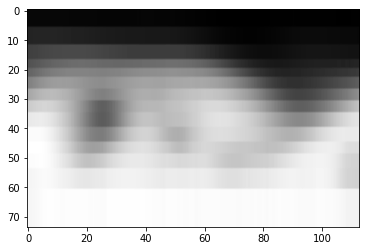

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
print(scaler1.fit(pressure_array))
print(scaler1.data_max_)
data1 = scaler1.transform(pressure_array)
print(data1)

kmeans3 = KMeans(n_clusters = cluster)
kmeans3.fit(data1)
labels3 = kmeans3.labels_
centroids3 = kmeans3.cluster_centers_

image = centroids3[labels3].reshape(pressure_df.shape)
image = np.flip(image, axis = 0)
plt.imshow(image, cmap = "gray")
plt.show()